# Detecção de Fraude em Transações Financeiras

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Exploratória dos Dados

In [2]:
# Importa dados de data/fraud_data.csv
df = pd.read_csv('../data/fraud_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            str    
 2   amount          float64
 3   nameOrig        str    
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        str    
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 534.0 MB


In [4]:
# Dropa coluna step
df = df.drop(columns=['step'])

In [5]:
# Percentual de registros isFraud
print(df['isFraud'].value_counts(normalize=True)*100)

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [6]:
# Percentual de registros isFlaggedFraud
print(df['isFlaggedFraud'].value_counts(normalize=True)*100)

isFlaggedFraud
0    99.999749
1     0.000251
Name: proportion, dtype: float64


In [7]:
# Total de registros nulos
df.isnull().sum().sum()

np.int64(0)

In [8]:
# Numero de registros e colunas
df.shape

(6362620, 10)

<Axes: title={'center': 'Distribuição de Tipos de Transações'}, xlabel='type'>

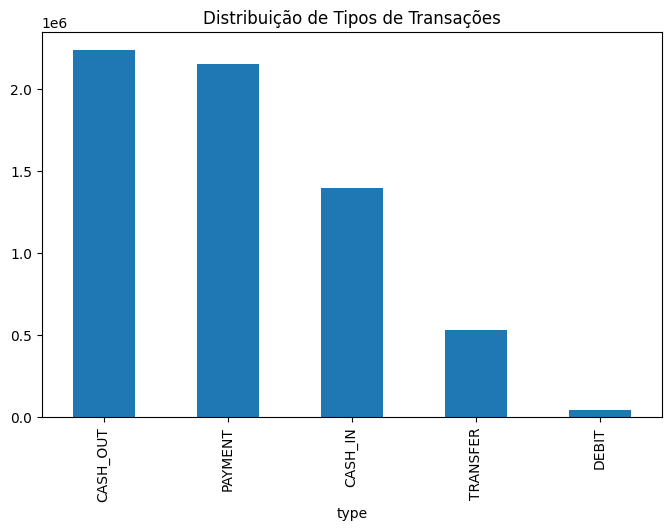

In [9]:
df.type.value_counts().plot(kind='bar', figsize=(8,5), title='Distribuição de Tipos de Transações')

type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


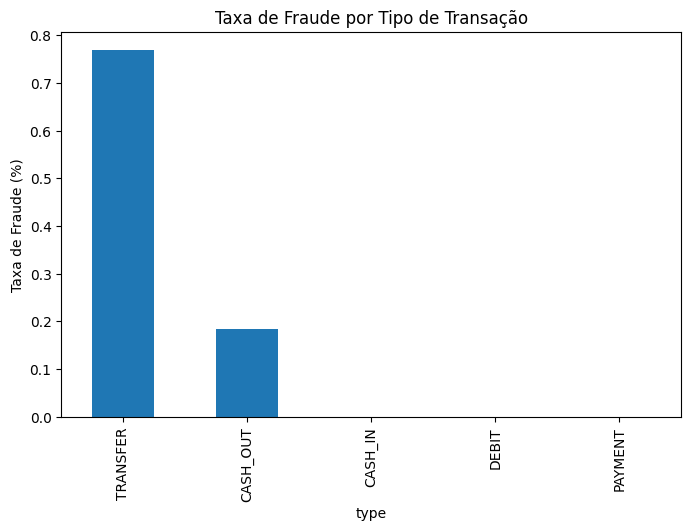

In [10]:
# Printa a distribuição de fraude por tipo de transação em percentual
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)*100
print(fraud_by_type)

# Plot fraud rate by type
fraud_by_type.plot(kind='bar', figsize=(8,5), title='Taxa de Fraude por Tipo de Transação')
plt.ylabel('Taxa de Fraude (%)')
plt.show()

In [11]:
# Descreve os dados da coluna amount em milhões
print(df['amount'].describe()/1e6)

count     6.362620
mean      0.179862
std       0.603858
min       0.000000
25%       0.013390
50%       0.074872
75%       0.208721
max      92.445517
Name: amount, dtype: float64


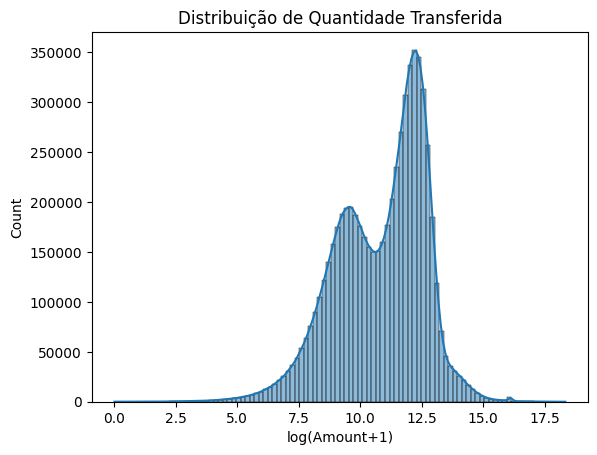

In [12]:
# Plota histograma de amount em escala logaritmica com 100 bins 
sns.histplot(np.log1p(df['amount']), bins=100, kde=True)
plt.xlabel('log(Amount+1)')
plt.ylabel('Count')
plt.title('Distribuição de Quantidade Transferida')
plt.show()

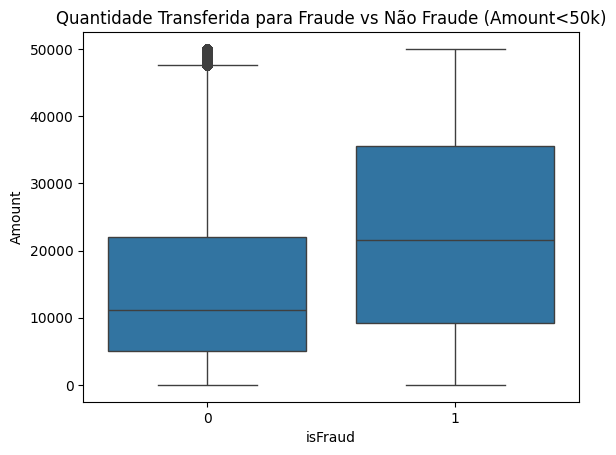

In [13]:
# Plota boxplot de amount por isFraud
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < 50000])
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.title('Quantidade Transferida para Fraude vs Não Fraude (Amount<50k)')
plt.show()

In [14]:
# Cria coluna balanceDiffOrig que é a diferença entre oldbalanceOrg e newbalanceOrig
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Faz o mesmo para balanceDiffDest
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [15]:
# Printa o número de transações com balanceDiffOrig negativo
print("Número de transações com balanceDiffOrig negativo:", (df['balanceDiffOrig'] < 0).sum())

# Printa o número de transações com balanceDiffDest negativo
print("Número de transações com balanceDiffDest negativo:", (df['balanceDiffDest'] < 0).sum())

Número de transações com balanceDiffOrig negativo: 1399253
Número de transações com balanceDiffDest negativo: 1238864


In [16]:
# 10 pessoas que mais enviaram transações
top_senders = df['nameOrig'].value_counts().head(10)
print("Top 10 remetentes que mais enviaram transações:")
print(top_senders)

Top 10 remetentes que mais enviaram transações:
nameOrig
C2098525306    3
C400299098     3
C1999539787    3
C1065307291    3
C545315117     3
C1976208114    3
C1784010646    3
C1530544995    3
C1902386530    3
C1677795071    3
Name: count, dtype: int64


In [17]:
# 10 pessoas que mais receberam transações
top_receivers = df['nameDest'].value_counts().head(10)
print("Top 10 destinatários que mais receberam transações:")
print(top_receivers)

Top 10 destinatários que mais receberam transações:
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


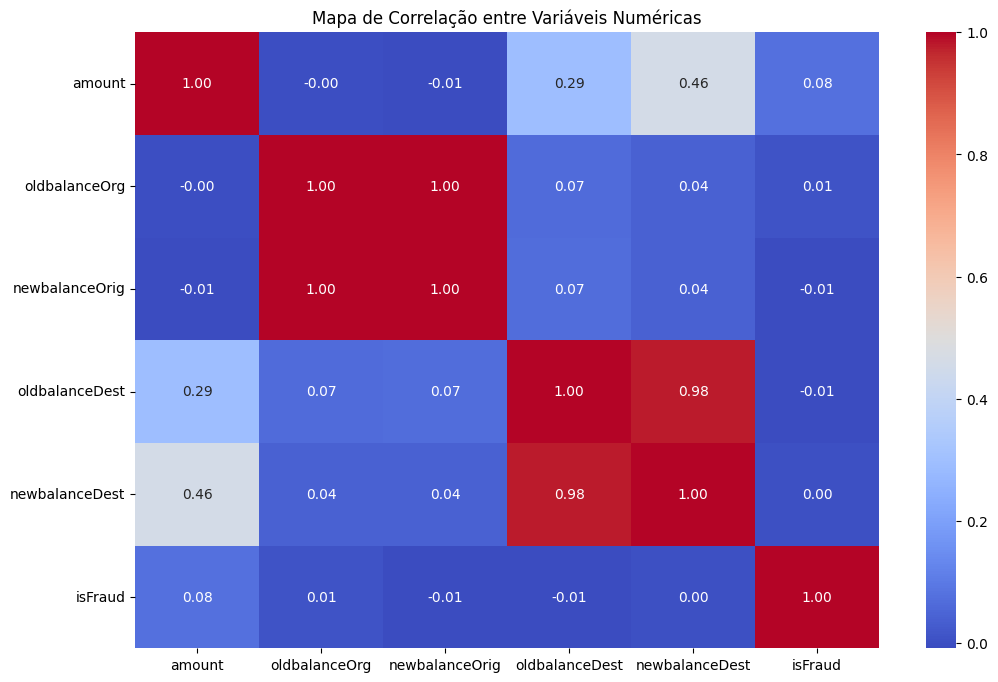

In [18]:
# Cria um heatmap de correlação entre as variáveis numéricas
plt.figure(figsize=(12,8))
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

In [19]:
# Usuários que zeraram as contas após a transação
zeroed_orig = df[(df['newbalanceOrig'] == 0) &
                (df['oldbalanceOrg'] > 0) &
                (df['type'].isin(['CASH_OUT', 'TRANSFER']))]
print(f"Número de usuários que zeraram a conta de origem: {len(zeroed_orig)}")

Número de usuários que zeraram a conta de origem: 1188074


## Feature Engineering

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Dropando colunas não utilizadas pelo modelo

In [21]:
df_model = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


### Colunas categoricas e numericas

In [22]:
# Separa variaveis em categoricas e numericas
categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

### Dados de treino e teste

In [23]:
# Separa x e y para o modelo
X = df_model.drop(columns=['isFraud'])
y = df_model['isFraud']

In [24]:
# Separa dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Pre-processamento

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Normaliza variaveis numericas
        ('cat', OneHotEncoder(drop='first'), categorical_features) # One-hot encoding de variaveis categoricas
    ])

## Pipeline

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

## Treinamento e Predição

In [27]:
# Treinamento do modelo
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [28]:
# Predição nos dados de teste
y_pred = pipeline.predict(X_test)

## Avaliação do modelo

In [29]:
# Primeira avaliação do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



<Axes: >

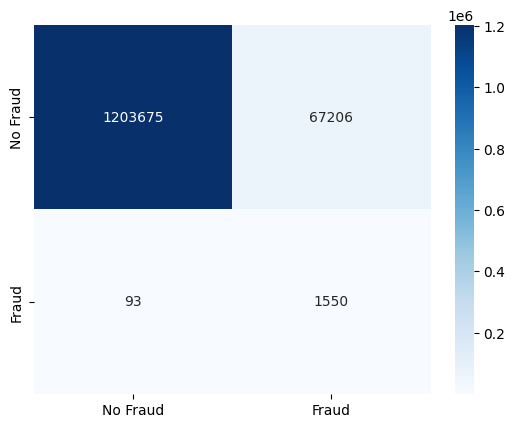

In [30]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])

- Precisão = 51%, modelo tem 49% de chance de prever falso positivo (transação legítima predita como fraude)
- Recall = 95%, modelo prevê corretamente 95% das fraudes, apenas 5% passaram despercebidas

## Exportação do modelo

In [31]:
import joblib

joblib.dump(pipeline, '../models/fraud_detection_pipeline.pkl')

['../models/fraud_detection_pipeline.pkl']